In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
color_palette = ['#845EC2', '#D65DB1', '#FF6F91', '#FF9671', '#FFC75F']

In [4]:
color_palette_opp = ['#EAADD4', '#FF8BC9', '#FFA18E']

In [4]:
# Only counts the ones in our desired set which means following the grammar string_start_w_1_all_0.ebnf
outputs = {
    "Bare prompt (no grammar)": {'10010': 47, '10000': 2, '10111': 33, '11101': 10, '10110': 178, '11001': 13, 
'11011': 12, '11100': 1, '10101': 68, '10100': 13, '11000': 0, '10011': 61, 
'11110': 2, '11111': 0, '10001': 11, '00000': 0, '11010': 49},
    "GCD: {0|1}*": {'10100': 28, '11010': 24, '11101': 6, '11000': 4, '10110': 114, '00000': 0, 
'11111': 0, '11110': 1, '10000': 22, '10101': 68, '11011': 22, '10001': 37, 
'10011': 46, '10111': 61, '10010': 52, '11001': 11, '11100': 4},
    "GCD: 00000|(1{0|1}*)": {'10111': 49, '10001': 27, '10010': 36, '11001': 11, '10011': 32, 
'11110': 1, '10101': 52, '11111': 0, '11101': 9, '00000': 129, '11100': 2, 
'11010': 30, '10110': 74, '10000': 10, '11011': 14, '10100': 24, '11000': 0},
    "GCD: 00000|(1{0|1}^4)": {'10100': 19, '11001': 9, '10110': 81, '10101': 48, '10000': 11, 
'10010': 27, '10111': 41, '11101': 2, '00000': 147, '11010': 27, 
'11000': 1, '11100': 1, '10001': 41, '11011': 14, '11111': 0, '10011': 28, '11110': 3},
    "Prompt: 00000|(1{0|1}^4)": {'10111': 12, '11000': 3, '11110': 19, '10011': 15, '11111': 253, '00000': 68, 
'10000': 5, '11011': 11, '10001': 4, '10010': 6, '10110': 29, '10101': 44, 
'10100': 7, '11001': 13, '11100': 0, '11010': 11, '11101': 0}
}

In [5]:
outputs_gad = {
    "GCD: {0|1}*": {'10100': 28, '11010': 24, '11101': 6, '11000': 4, '10110': 114, '00000': 0, 
'11111': 0, '11110': 1, '10000': 22, '10101': 68, '11011': 22, '10001': 37, 
'10011': 46, '10111': 61, '10010': 52, '11001': 11, '11100': 4},
    "GAD: 00000|(1{0|1}*)": {'10010': 43, '10100': 29, '11010': 26, '11011': 24, '10110': 100, '11000': 1, 
'11100': 7, '10000': 11, '11110': 1, '10011': 66, '11101': 8, '11111': 1, '10111': 69, 
'10001': 31, '11001': 16, '10101': 67}
}

In [9]:
outputs_gad3 = {
    "Bare prompt (no grammar)": {'10010': 47, '10000': 2, '10111': 33, '11101': 10, '10110': 178, '11001': 13, 
'11011': 12, '11100': 1, '10101': 68, '10100': 13, '11000': 0, '10011': 61, 
'11110': 2, '11111': 0, '10001': 11, '00000': 0, '11010': 49},
    "GCD: {0|1}*": {'10100': 28, '11010': 24, '11101': 6, '11000': 4, '10110': 114, '00000': 0, 
'11111': 0, '11110': 1, '10000': 22, '10101': 68, '11011': 22, '10001': 37, 
'10011': 46, '10111': 61, '10010': 52, '11001': 11, '11100': 4},
    "GAD: 00000|(1{0|1}*)": {'10010': 43, '10100': 29, '11010': 26, '11011': 24, '10110': 100, '11000': 1, 
'11100': 7, '10000': 11, '11110': 1, '10011': 66, '11101': 8, '11111': 1, '10111': 69, 
'10001': 31, '11001': 16, '10101': 67}
}

In [6]:
outputs_opp = {
    "GCD: {0|1}*": {'00101': 0, '01000': 4, '01101': 138, '00000': 0, '00111': 0, '01110': 79, '01010': 51, 
'00010': 0, '00001': 0, '01100': 39, '01001': 34, '00100': 0, '11111': 2, '01011': 103, 
'00011': 0, '00110': 0, '01111': 50},
    "GCD: 11111|(0{0|1}*)": {'01001': 12, '01101': 33, '00000': 0, '00110': 0, '01111': 15, '00101': 0, '01110': 22, 
'01000': 1, '00100': 0, '00111': 0, '01100': 8, '00001': 0, '01011': 32, '00010': 0, 
'01010': 14, '00011': 0, '11111': 363},
    "GCD: 11111|(0{0|1}^4)": {'00101': 0, '01000': 0, '01101': 29, '00000': 0, '00111': 0, '01110': 29, '01010': 20, 
'00010': 0, '00001': 0, '01100': 11, '01001': 5, '00100': 0, '11111': 365, '01011': 29, 
'00011': 0, '00110': 0, '01111': 12}
}

## apply avg non-terminal reweighing factor

In [14]:
outputs_gad_avg_score = {
    "apply avg non-terminal success rate": {'000': 189, '101': 106, '100': 80, '111': 90, '110': 35},
    "GCD: (1{0|1}*|000)": {'000': 186, '100': 83, '111': 105, '110': 28, '101': 98},
    "GCD: {0|1}*": {'101': 134, '100': 136, '111': 162, '110': 44, '000': 24},
    "apply gt score": {'101': 100, '000': 136, '100': 92, '110': 56, '111': 116},
    "gt: cal from logits": {'111': 134, '110': 43, '101': 105, '100': 91, '000': 127}}

In [7]:
for method, counts in outputs.items():
    total_count = sum(counts.values())
    print(f"{method}: Sum of values {'is' if total_count == 500 else 'is not'} 500 ({total_count})")

Bare prompt (no grammar): Sum of values is 500 (500)
GCD: {0|1}*: Sum of values is 500 (500)
GCD: 00000|(1{0|1}*): Sum of values is 500 (500)
GCD: 00000|(1{0|1}^4): Sum of values is 500 (500)
Prompt: 00000|(1{0|1}^4): Sum of values is 500 (500)


In [8]:
for method, counts in outputs_opp.items():
    total_count = sum(counts.values())
    print(f"{method}: Sum of values {'is' if total_count == 500 else 'is not'} 500 ({total_count})")

GCD: {0|1}*: Sum of values is 500 (500)
GCD: 11111|(0{0|1}*): Sum of values is 500 (500)
GCD: 11111|(0{0|1}^4): Sum of values is 500 (500)


In [21]:
def plot_outputs_method(outputs):
    # Set up the figure and axis for the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Iterate over outputs to plot each as a separate stacked bar
    for i, (method, output) in enumerate(outputs.items(), 1):
        labels = list(output.keys())
        values = list(output.values())
        bottom = 0  # Starting point for the first bar
        
        for label, value in zip(labels, values):
            ax.bar(method, value, bottom=bottom, label=label if i == 1 else "", edgecolor='white')
            bottom += value
    
    # Add legend outside of the plot
    ax.legend(title="Binary Strings", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set labels and title
    plt.ylabel('Counts')
    plt.title('Output Distribution by Method')
    plt.xticks(rotation=45, ha="right")
    
    plt.tight_layout()
    plt.show()

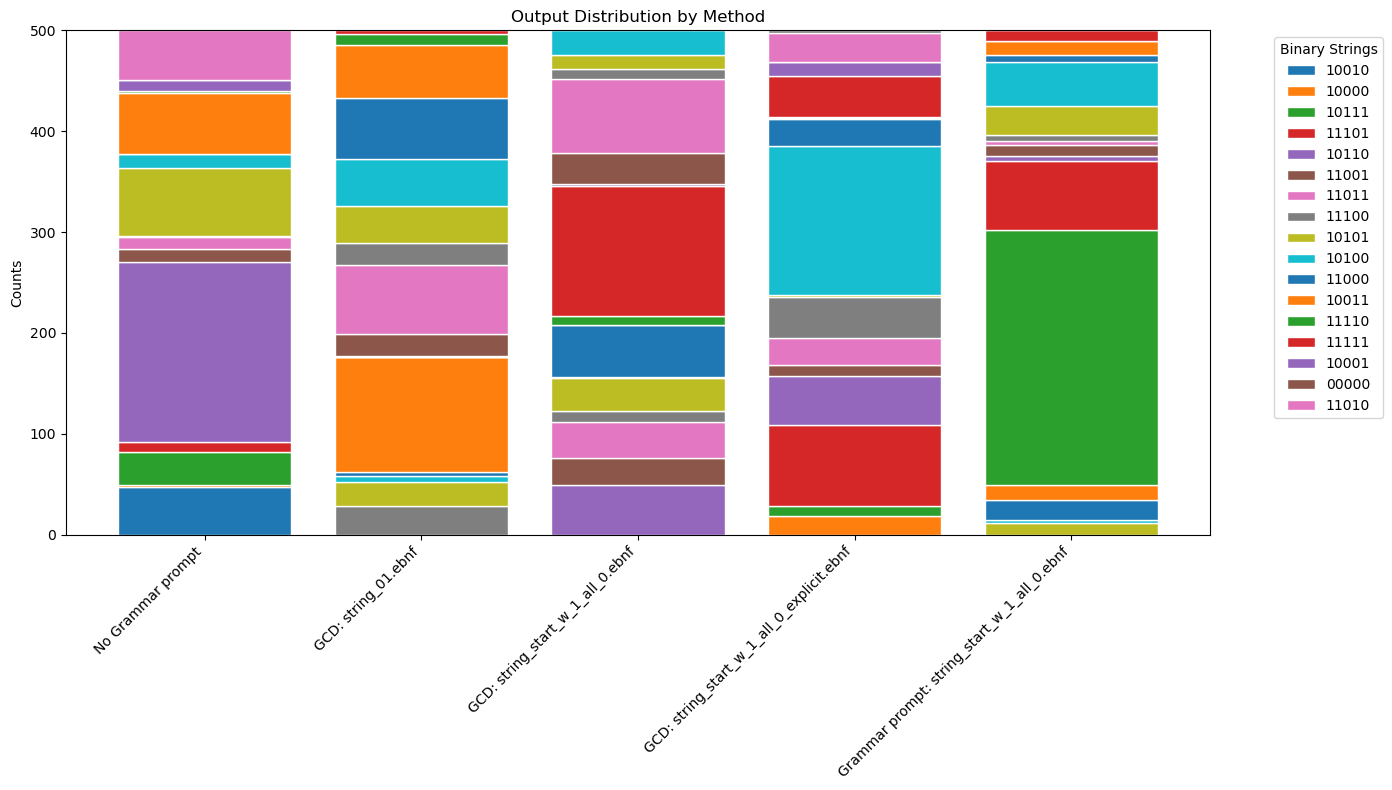

In [22]:
plot_outputs_method(outputs)

In [23]:
def plot_outputs_strings_no_count_label(outputs):
    # Prepare data for plotting
    labels = sorted(set(key for output in outputs.values() for key in output))  # Get all unique binary strings
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(18, 8))
    for i, (method, output) in enumerate(outputs.items()):
        values = [output.get(key, 0) for key in labels]
        rects = ax.bar(x + i*width, values, width, label=method, color=color_palette[i])
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title('Counts by binary string and method')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels to prevent overlap
    ax.legend()
    
    plt.tight_layout()
    plt.show()

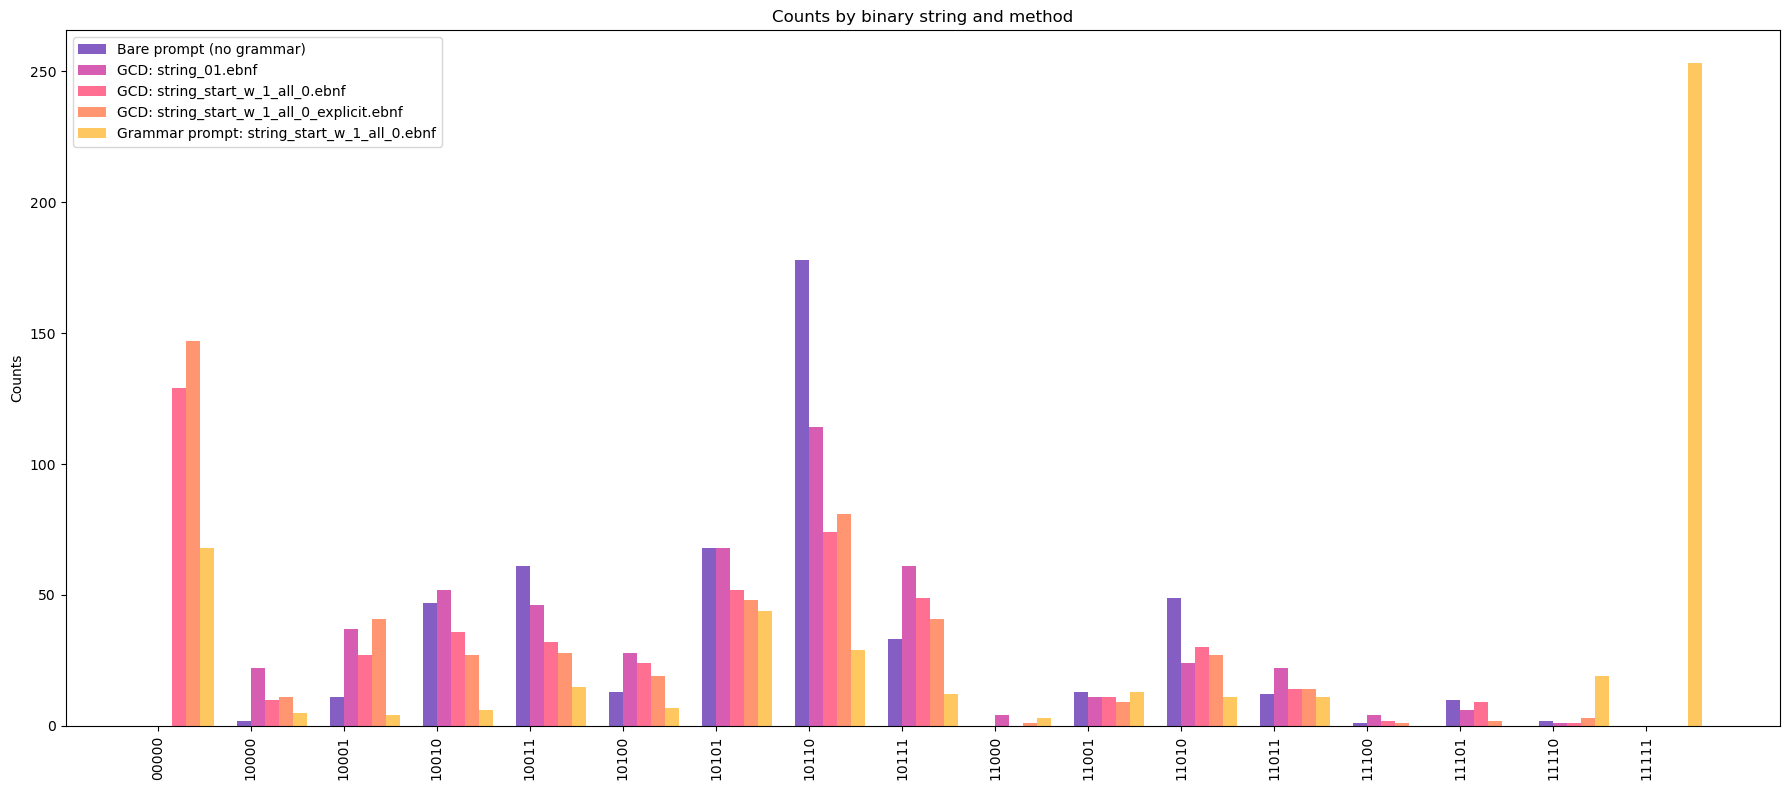

In [34]:
plot_outputs_strings_no_count_label(outputs)

In [ ]:
title = "'Binary String Distributions (Length 5) Across Methods Following the Grammar: Ensuring Sum = 500, Generated by Mixtral-8x7B-Instruct-v0.1'"

In [8]:
title = "'Binary String Distributions (Length 3) Across Methods Following the Grammar: Ensuring Sum = 500, Generated by Mistral-7B-Instruct-v0.1'"

In [7]:
# plot usually used
def plot_outputs_strings_with_count_label(outputs, color_palette, save_path, title):
    # Prepare data for plotting
    labels = sorted(set(key for output in outputs.values() for key in output))  # Get all unique binary strings
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size for more space
    for i, (method, output) in enumerate(outputs.items()):
        values = [output.get(key, 0) for key in labels]
        rects = ax.bar(x + i * width, values, width, label=method, color=color_palette[i])

        # Adding count labels above bars with slight adjustments
        for rect, value in zip(rects, values):
            height = rect.get_height()
            ax.annotate('{}'.format(value),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # Slightly higher offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=8,  # Smaller font size
                        rotation=45)  # Rotate labels to reduce overlap

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title(title)
    ax.set_xticks(x + width * len(outputs) / 2 - width / 2)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels to prevent overlap
    ax.legend()

    plt.tight_layout()
    fig.savefig(save_path, format='pdf')
    plt.show()

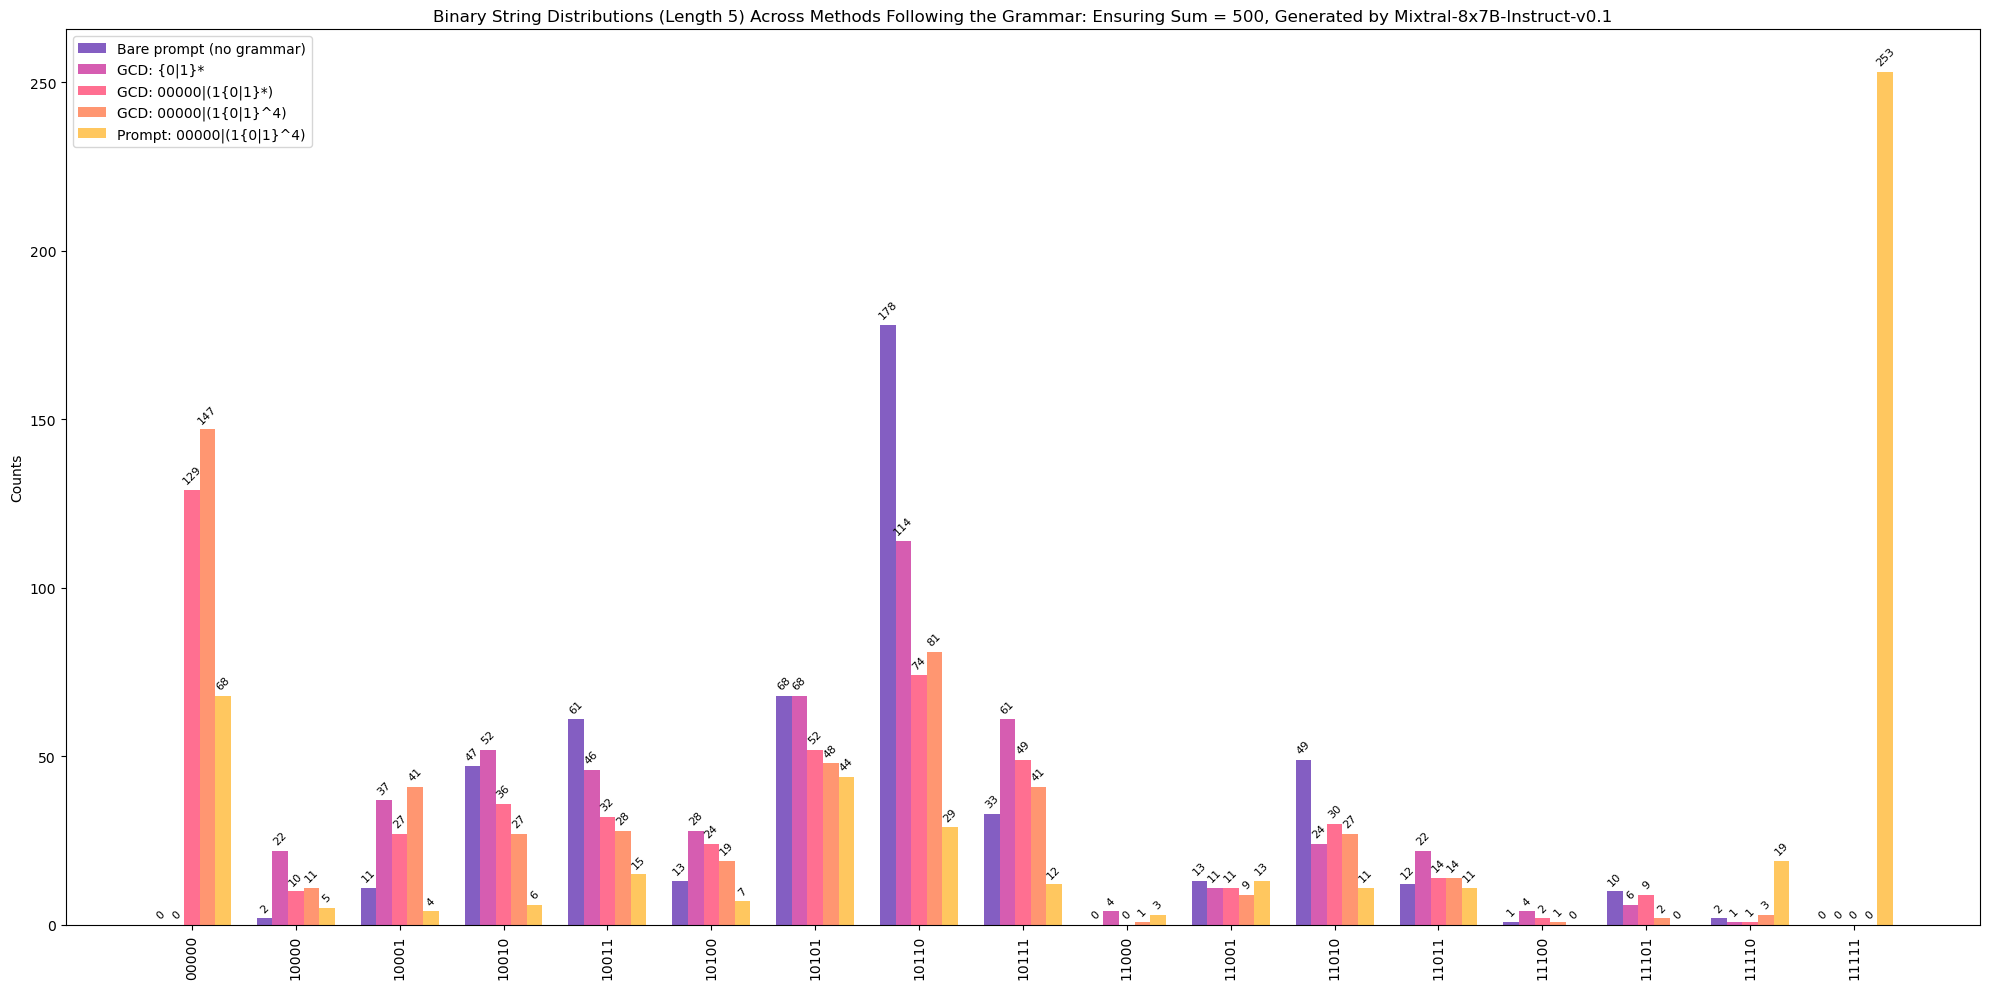

In [5]:
plot_outputs_strings_with_count_label(outputs, color_palette, save_path='plots/main_results_m-Mixtral-8x7B-instruct-v0.1_mds-5_iter-500.pdf')

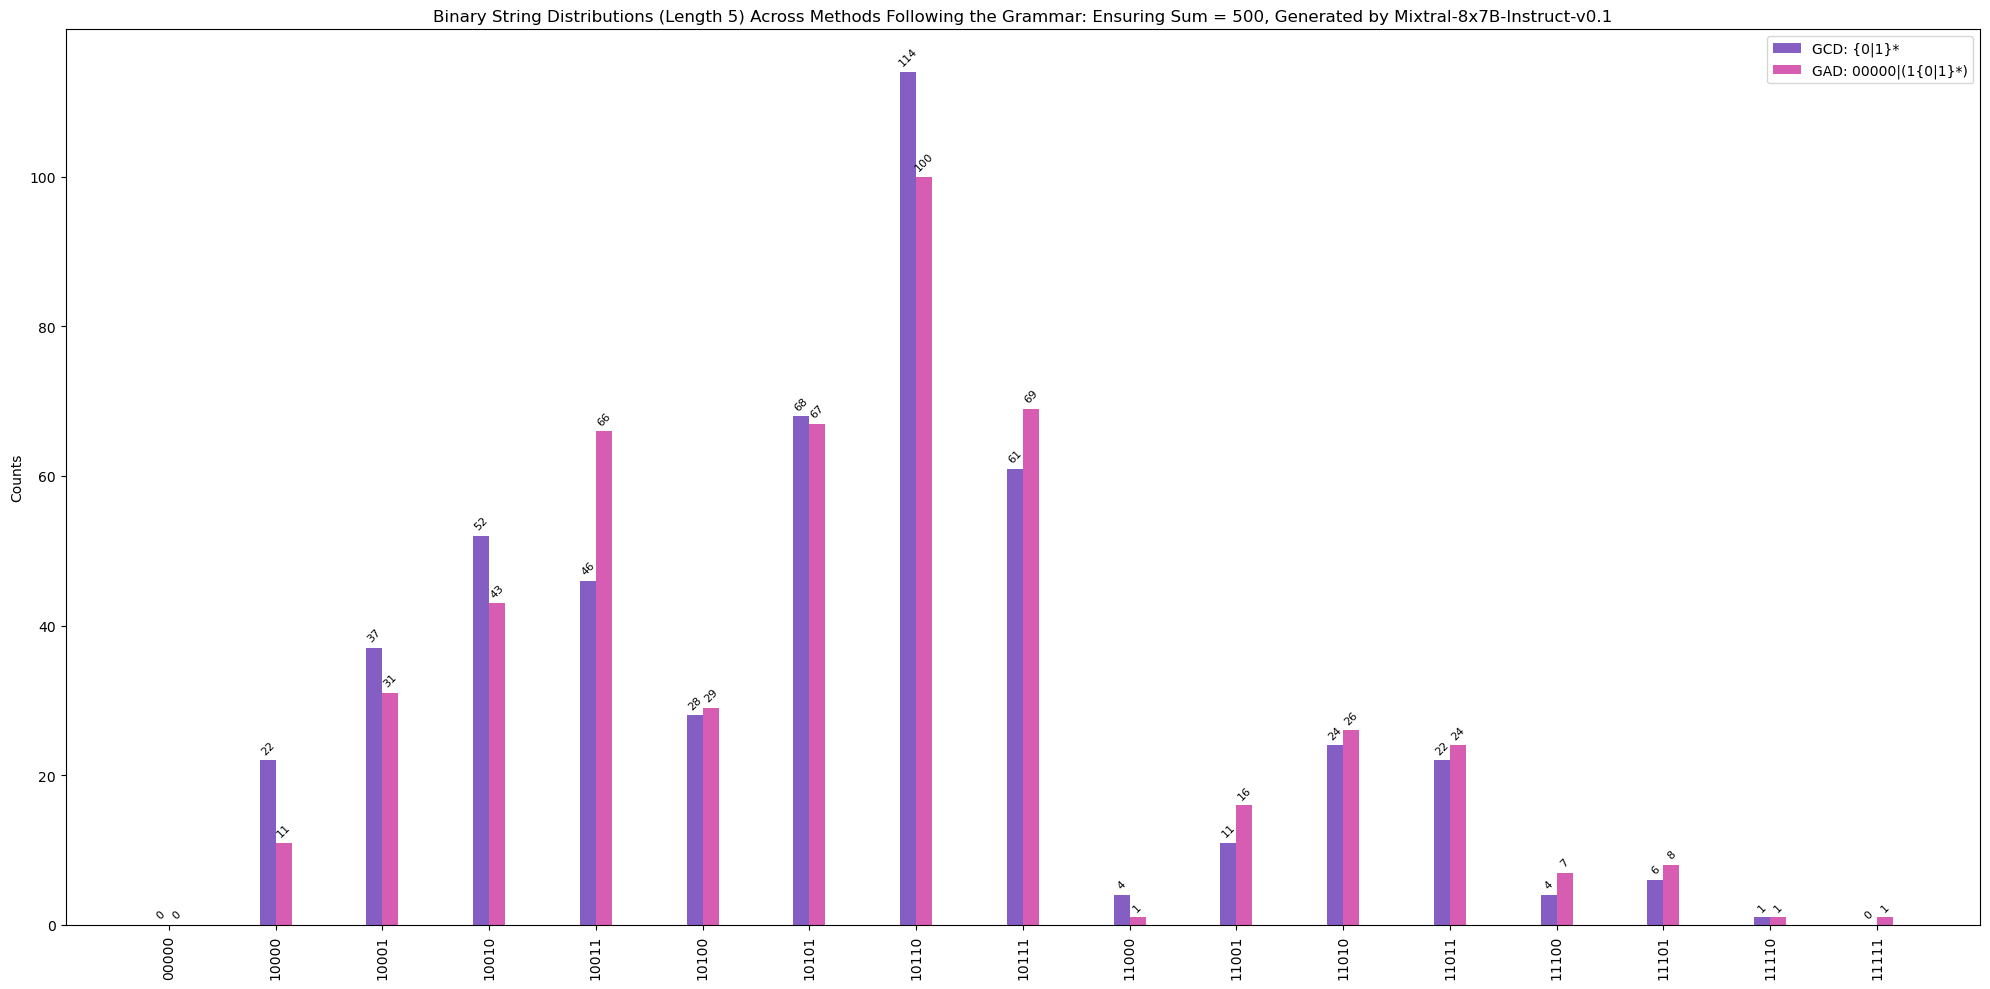

In [8]:
plot_outputs_strings_with_count_label(outputs_gad, color_palette, save_path='plots/main_results_gad_m-Mixtral-8x7B-instruct-v0.1_mds-5_iter-500_string_start_w_1_all_0.pdf')

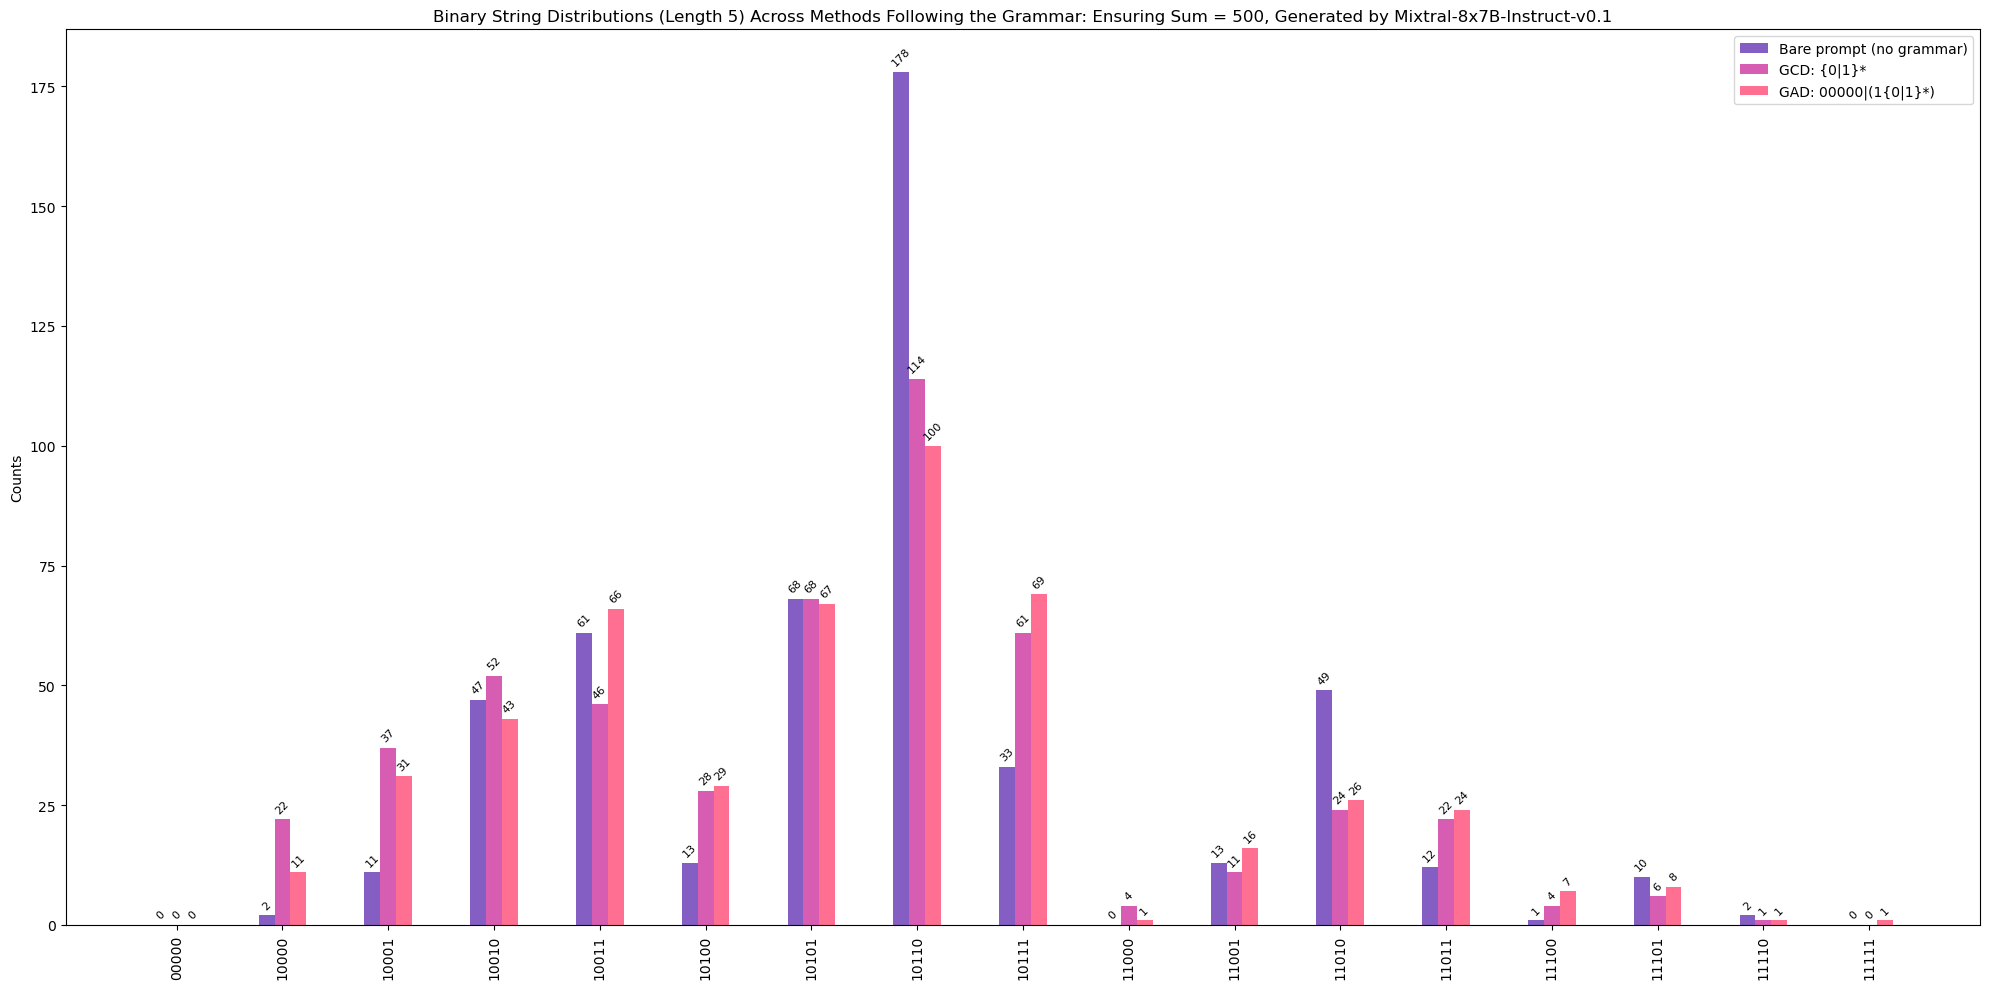

In [10]:
plot_outputs_strings_with_count_label(outputs_gad3, color_palette, save_path='plots/main_results_gad_m-Mixtral-8x7B-instruct-v0.1_mds-5_iter-500_string_start_w_1_all_0.pdf')

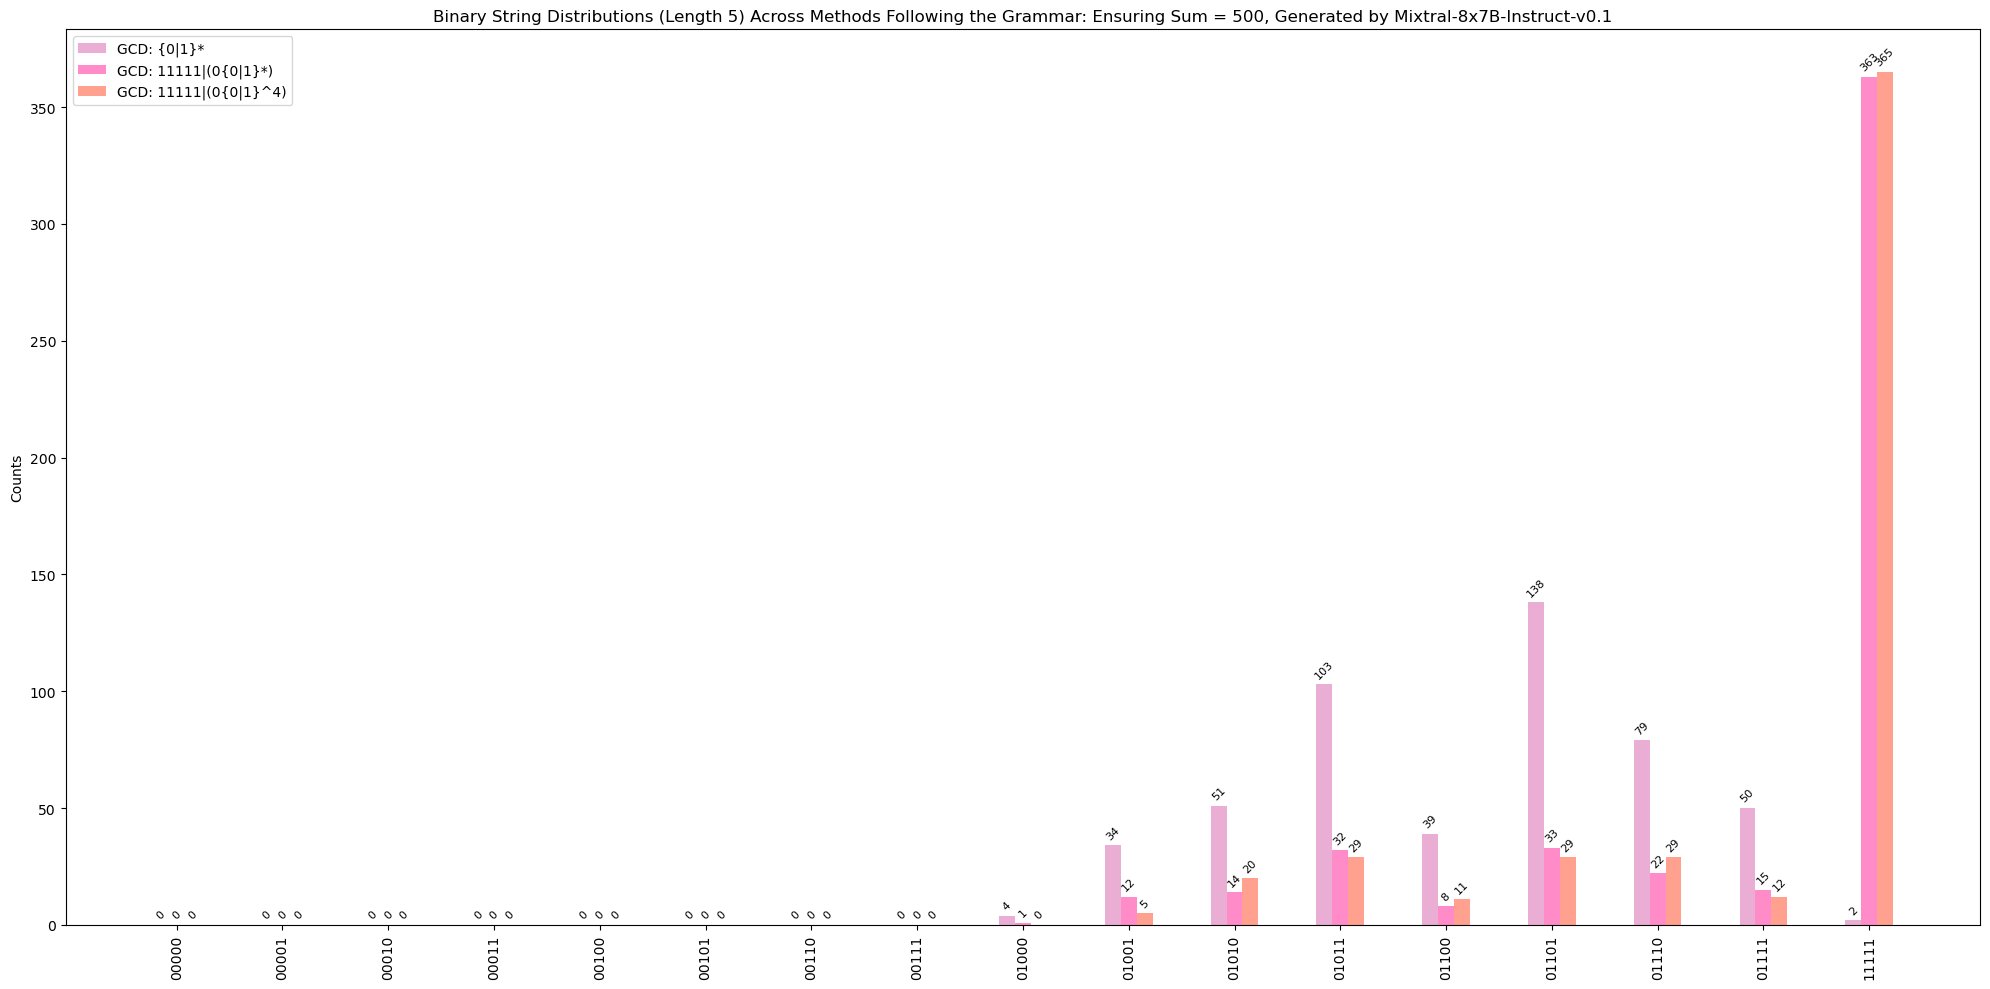

In [11]:
plot_outputs_strings_with_count_label(outputs_opp, color_palette_opp, save_path='plots/main_results_opp3_m-Mixtral-8x7B-instruct-v0.1_mds-5_iter-500.pdf')

In [15]:
# start w 1 all 0
output_bit = {
    "GCD: {0|1}*": {'10100': 11, '11010': 0, '11101': 0, '11000': 0, '10110': 173, 
                    '00000': 0, '11111': 0, '11110': 0, '10000': 0, '10101': 44, 
                    '11011': 0, '10001': 68, '10011': 86, '10111': 101, '10010': 17, 
                    '11001': 0, '11100': 0},
    "GCD: 00000|(1{0|1}*)": {'11011': 0, '10010': 2, '11010': 0, '10110': 20, 
                             '11101': 0, '10001': 4, '10101': 6, '10000': 0, '00000': 452, 
                             '10100': 1, '10011': 3, '11100': 0, '11111': 0, '11110': 0, 
                             '11001': 0, '10111': 12, '11000': 0}
}

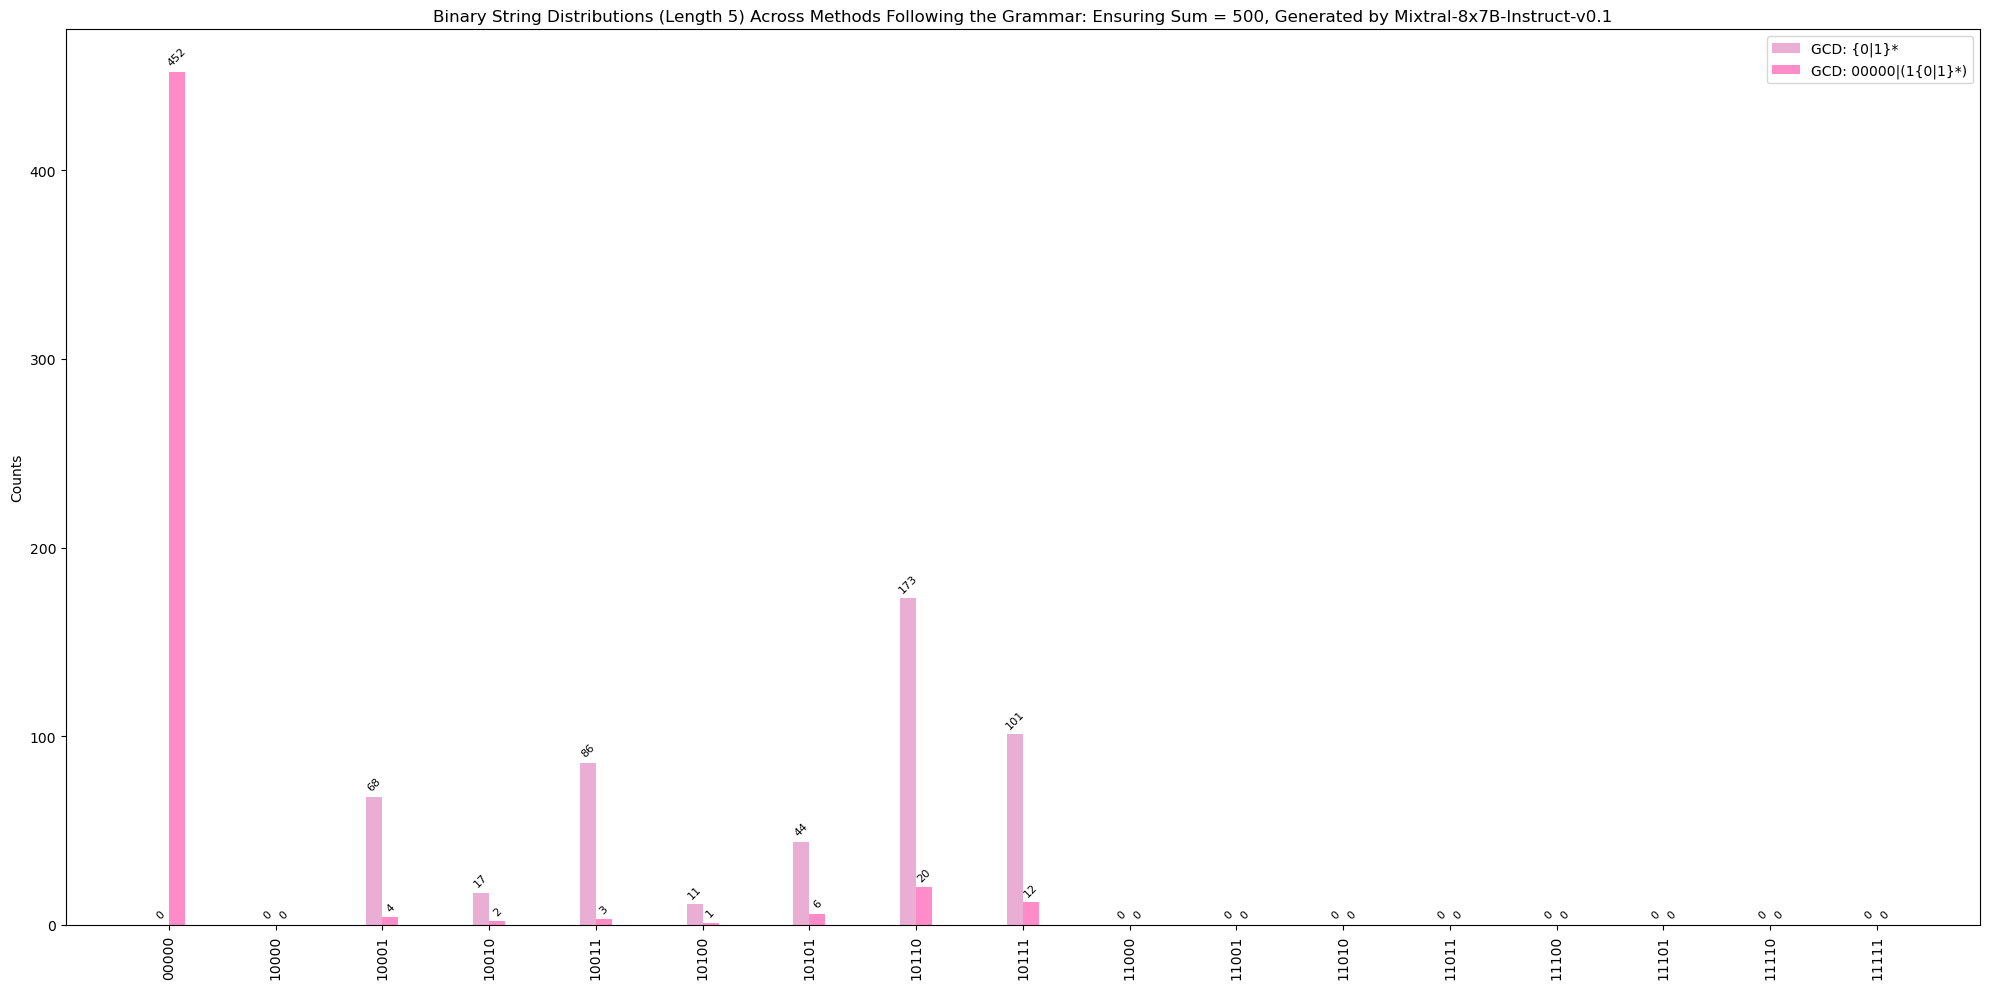

In [16]:
plot_outputs_strings_with_count_label(output_bit, color_palette_opp, save_path='plots/main_results_bit_m-Mixtral-8x7B-instruct-v0.1_start_w_1_all_0.pdf')

In [20]:
# start w 0 all 1
output_bit = {
    "GCD: {0|1}*": {'00101': 44, '01000': 0, '01101': 0, '00000': 0, '00111': 254, '01110': 0, 
                    '01010': 0, '00010': 0, '00001': 24, '01100': 0, '01001': 0, '00100': 0, 
                    '11111': 0, '01011': 31, '00011': 122, '00110': 25, '01111': 0},
    "GCD: 11111|(0{0|1}*)": {'01000': 0, '00110': 9, '00111': 52, '00010': 0, '01101': 0, 
                             '01100': 0, '11111': 379, '00011': 34, '00000': 0, '01010': 0, 
                             '01011': 9, '00100': 0, '00101': 10, '01110': 0, '00001': 7, 
                             '01111': 0, '01001': 0}
}

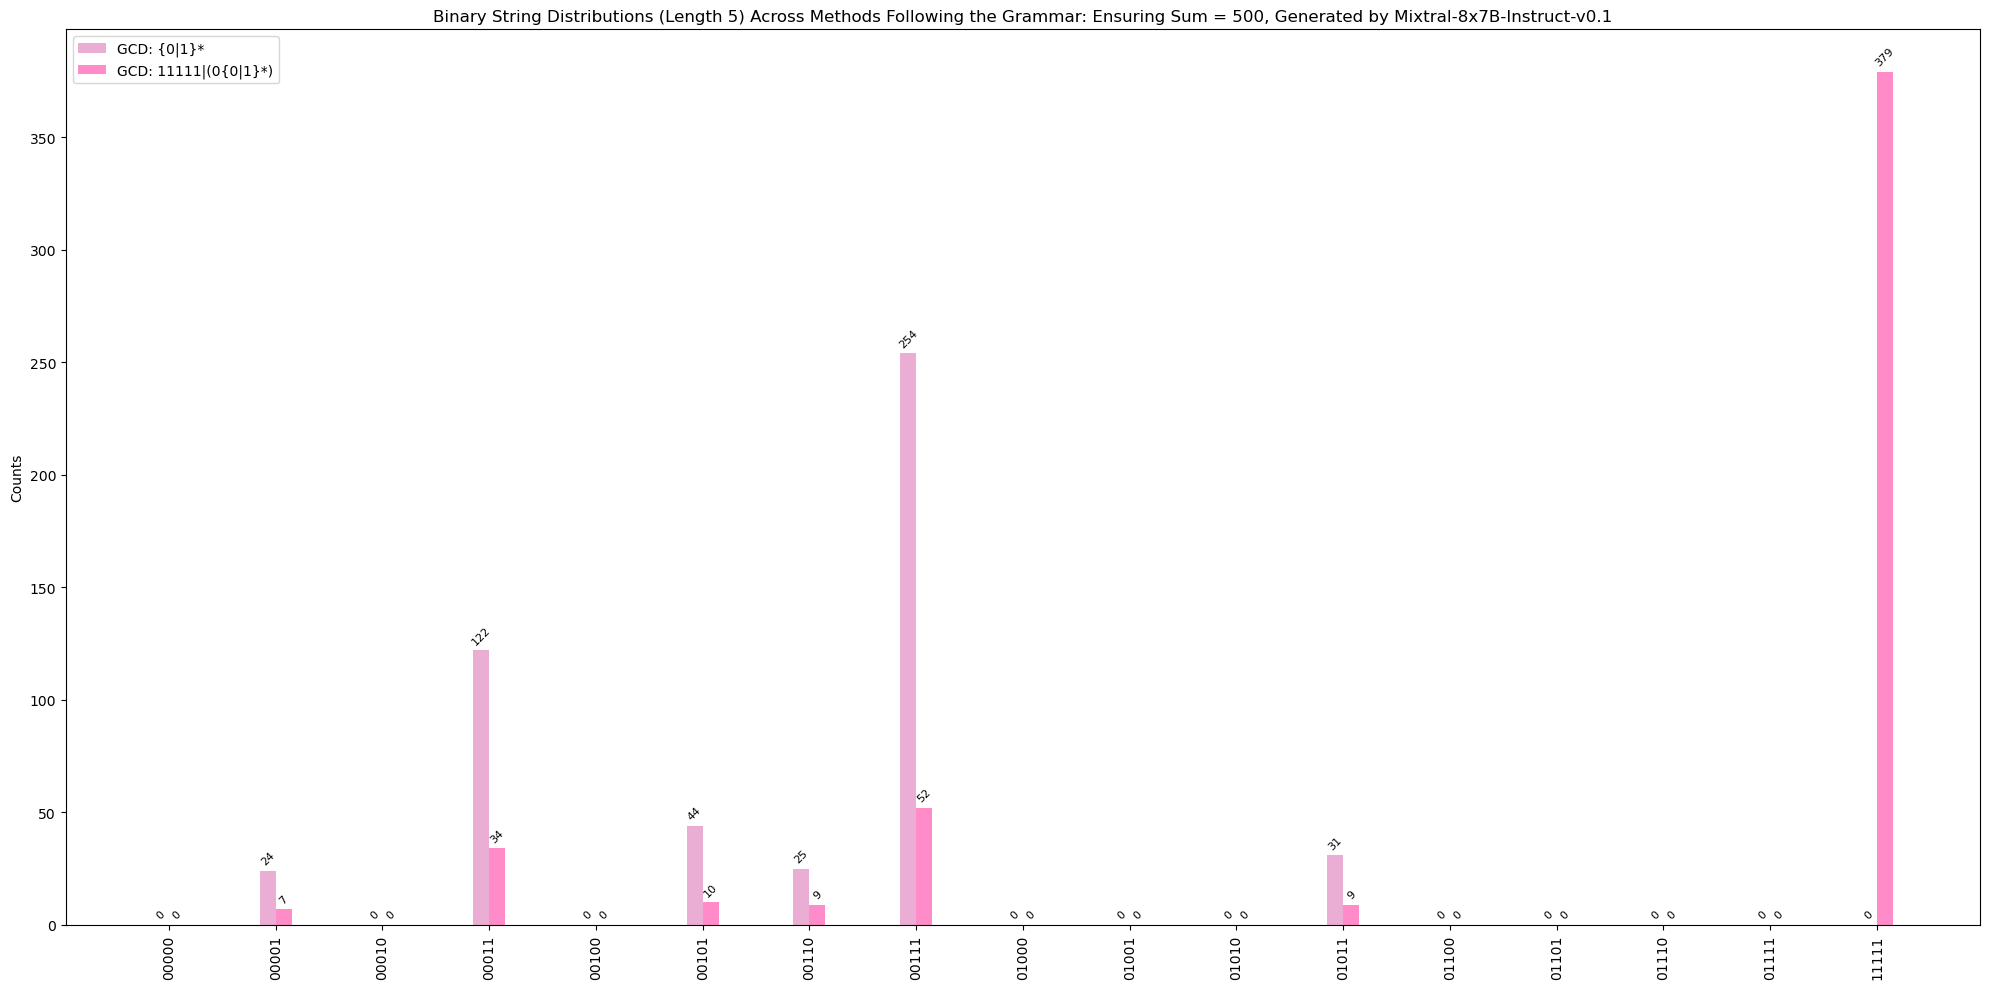

In [21]:
plot_outputs_strings_with_count_label(output_bit, color_palette_opp, save_path='plots/main_results_bit_m-Mixtral-8x7B-instruct-v0.1_start_w_0_all_1.pdf')

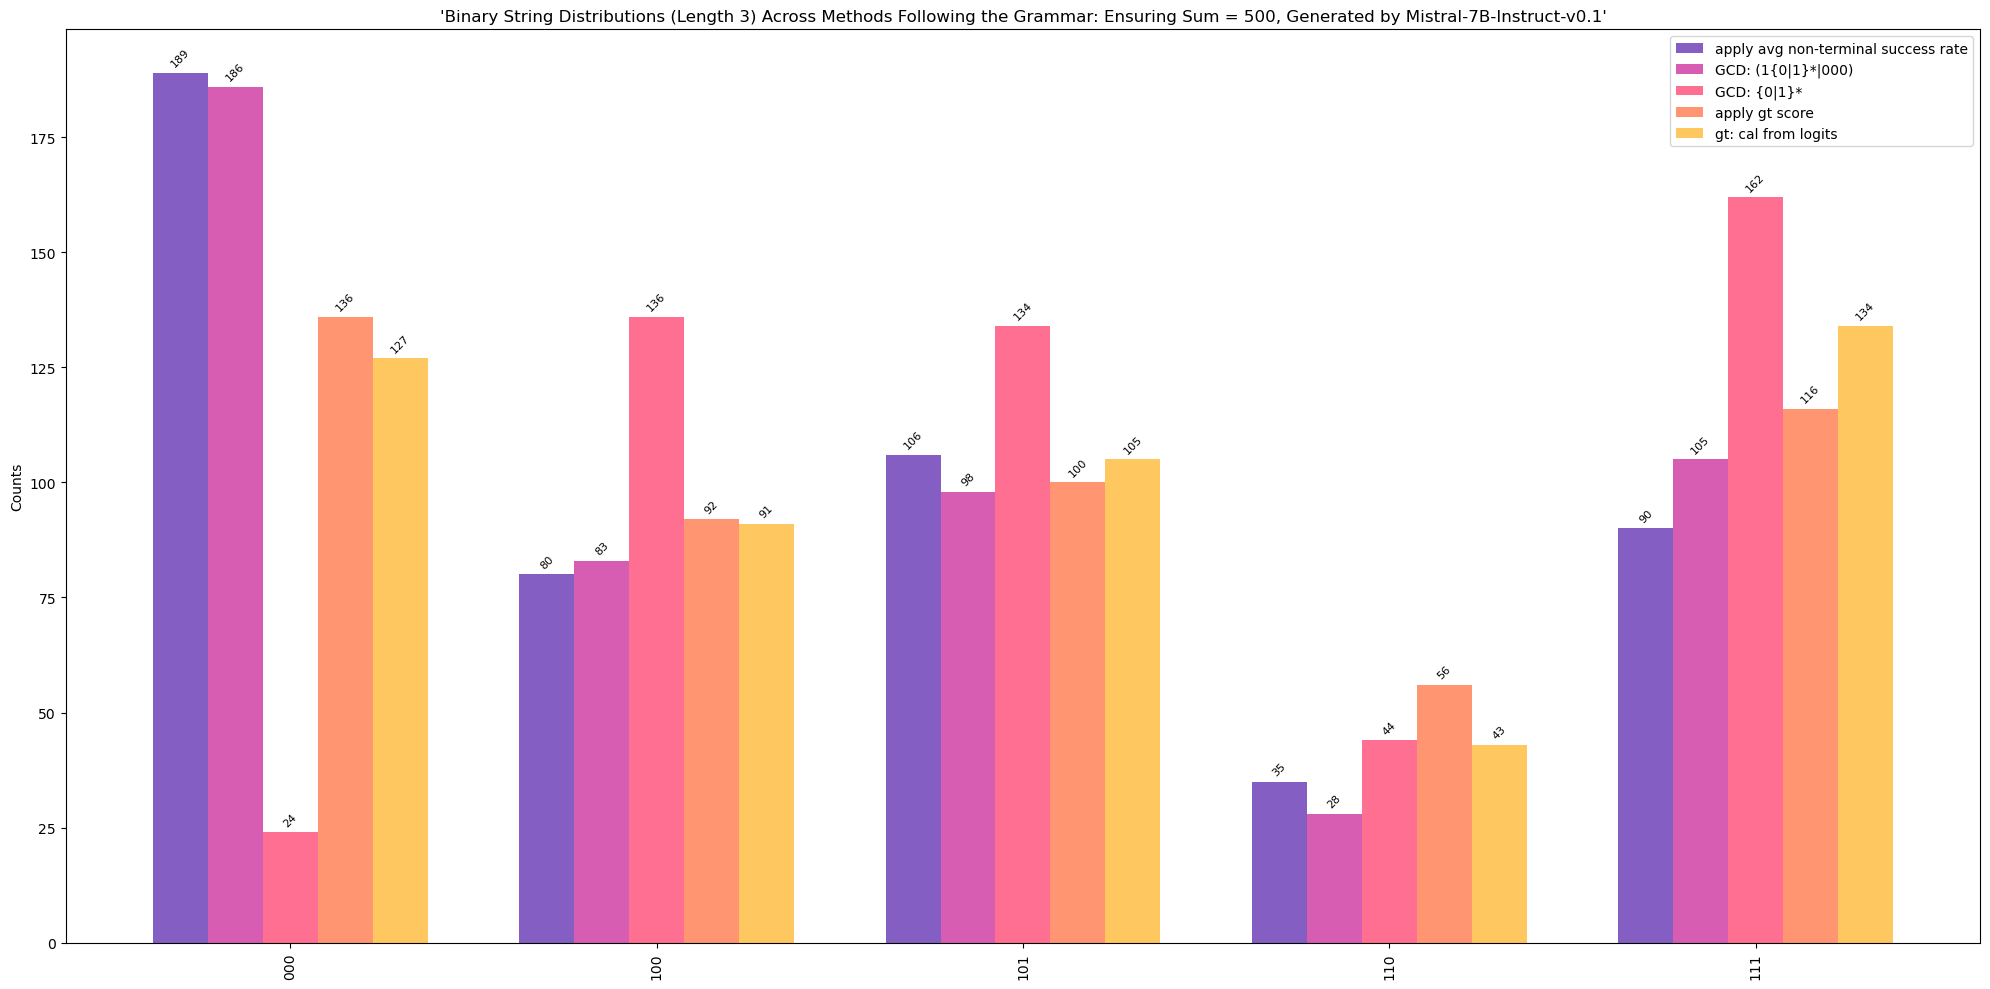

In [15]:
plot_outputs_strings_with_count_label(outputs_gad_avg_score, color_palette, 'plots/main_results_m-Mistral-7B-instruct-v0.1_avg_production_rule_reweight_gt.pdf', title)

In [16]:
def plot_outputs_strings_bar_and_line(outputs, color_palette):
    # Prepare data for plotting
    labels = sorted(set(key for output in outputs.values() for key in output))  # Get all unique binary strings
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size for more space
    
    # Number of methods to plot
    num_methods = len(outputs)
    
    # Calculate width for bars so they fit next to each other
    total_width = width * num_methods
    individual_width = total_width / num_methods
    
    # Adjust x positions for each method
    adjustments = np.linspace(-total_width / 2, total_width / 2, num_methods)
    
    for i, (method, output) in enumerate(outputs.items()):
        # Ensure consistent order of values according to sorted labels
        values = [output.get(label, 0) for label in labels]
        
        # Adjusted x positions for the current method
        adjusted_x = x + adjustments[i]
        
        # Plot bars for this method
        ax.bar(adjusted_x, values, individual_width, label=method, color=color_palette[i], alpha=0.7)
        
        # Plot a line for this method
        ax.plot(adjusted_x, values, color=color_palette[i], marker='o', linestyle='-', linewidth=2)
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Counts')
    ax.set_title('Binary String Distributions (Length 5) Across Methods Following the Grammar: Ensuring Sum = 500, Generated by Mixtral-8x7B-Instruct-v0.1')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels to prevent overlap
    ax.legend()

    plt.tight_layout()
    # fig.savefig(save_path, format='pdf')  # Save the figure as a PDF
    plt.show()  # Display the plot

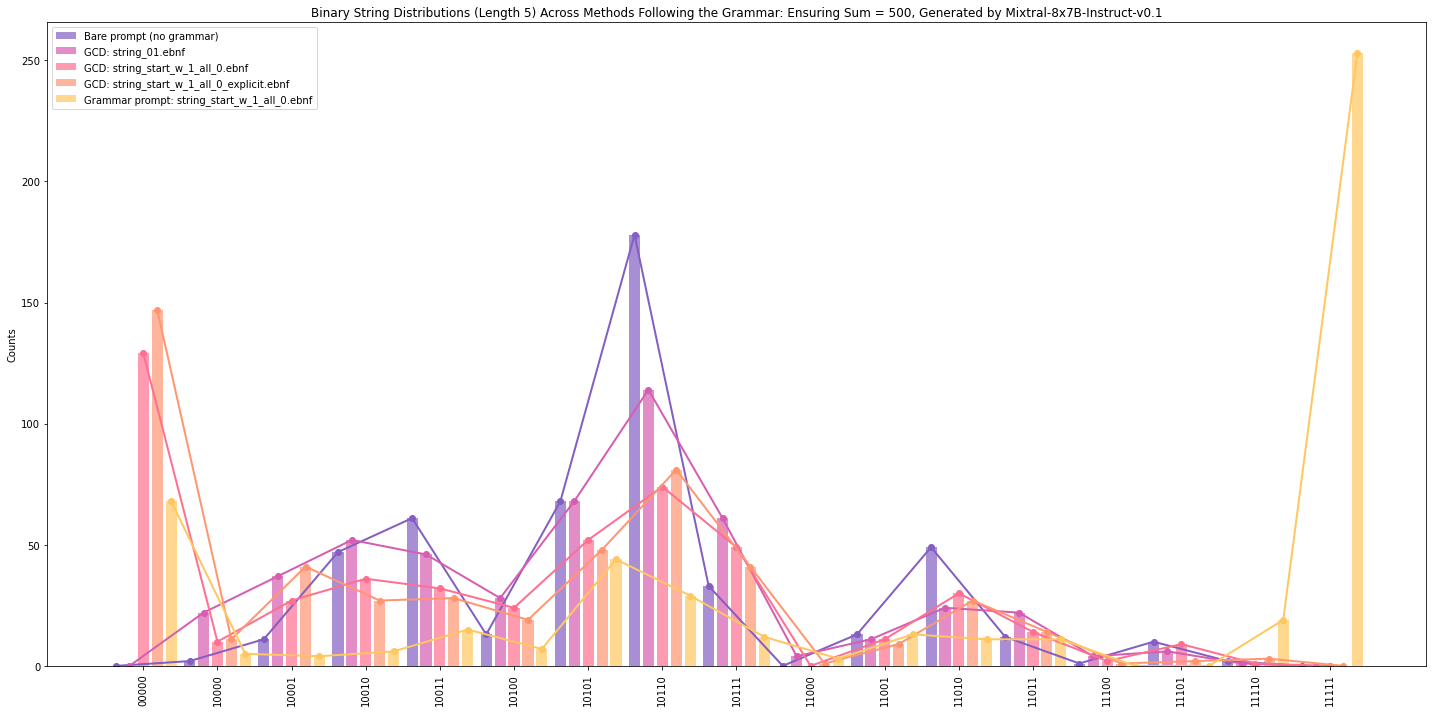

In [17]:
plot_outputs_strings_bar_and_line(outputs, color_palette)

In [27]:
def plot_outputs_pdf(outputs):
    # Convert the nested dictionary structure into a flat DataFrame
    data = []
    for method, counts in outputs.items():
        for binary_string, count in counts.items():
            # Ensure 'count' is numeric. If 'count' values are always numeric, this step is redundant but safe.
            data.append({'Method': method, 'Binary String': binary_string, 'Count': float(count)})
    df = pd.DataFrame(data)
    
    # Define a color palette (adjust or expand as needed based on the number of methods)
    color_palette = sns.color_palette('husl', n_colors=len(df['Method'].unique()))
    
    # Ensure the 'Count' column is treated as numeric explicitly if not already
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='Count', hue='Method', fill=True, common_norm=False, palette=color_palette, alpha=0.5)
    
    plt.title('PDF of Binary String Counts Across Methods')
    plt.xlabel('Count')
    plt.ylabel('Density')
    plt.legend(title='Method')
    plt.tight_layout()
    
    # Save the plot as a PDF
    plt.savefig('outputs_pdf_plot.pdf')
    plt.show()

ValueError: could not convert string to float: 'Bare prompt (no grammar)'

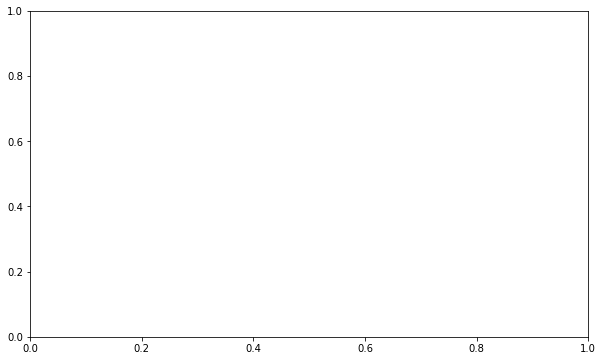

In [28]:
plot_outputs_pdf(outputs)